### 1. Implementing the intensity transformation

256


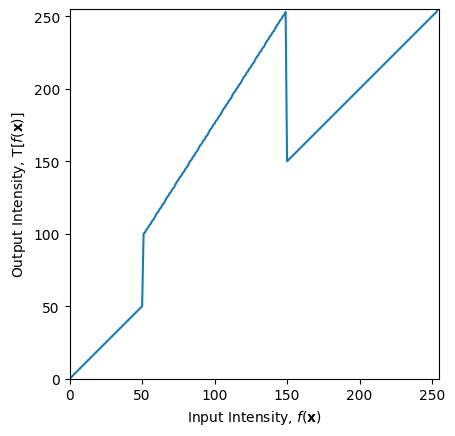

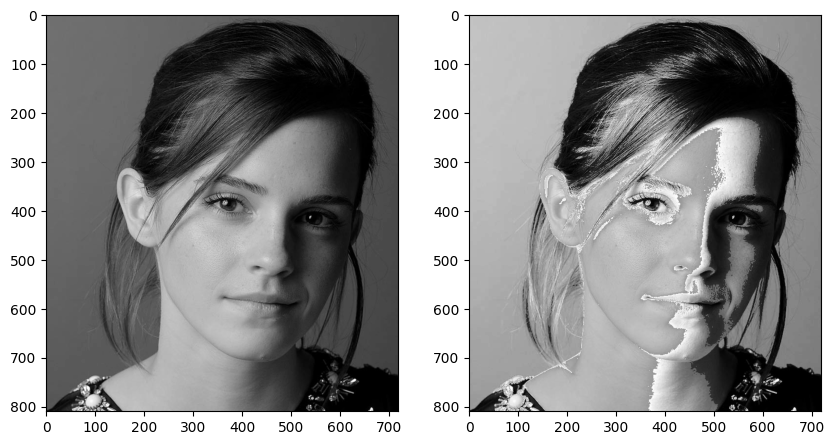

In [18]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#generating intensity map
transform = np.linspace(start = 0, stop = 50, num = 51, dtype=np.uint8)
transform = np.insert(transform,transform.size, np.linspace(start = 100, stop = 255, num = 100, dtype=np.uint8))
transform = np.insert(transform,transform.size-1, np.linspace(start = 150, stop = 255, num = 105, dtype=np.uint8))
#print(transform.size)
fig,ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel( r'Input Intensity, $f(\mathbf{x})$')
ax.set_ylabel('Output Intensity, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('task1_transform.png')
plt.show()

img_orig = cv.imread('emma_gray.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform)
fig,ax = plt.subplots(1,2,figsize=(10,30))
ax[0].imshow(img_orig,cmap='gray', vmin=0, vmax=255)
ax[1].imshow(image_transformed,cmap='gray', vmin=0, vmax=255)
plt.show()

### 2. Apply a similar operation as above to fig 2

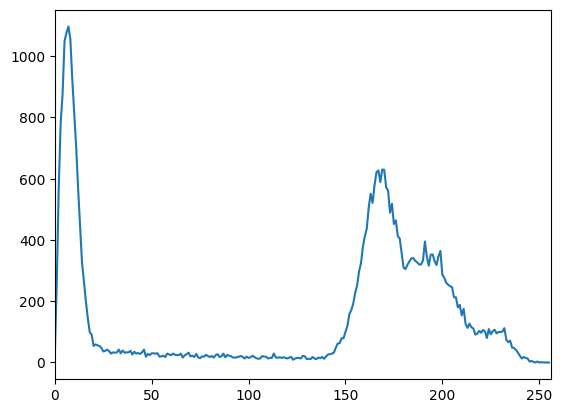

256


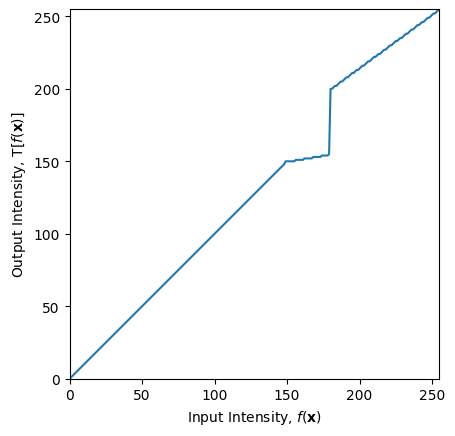

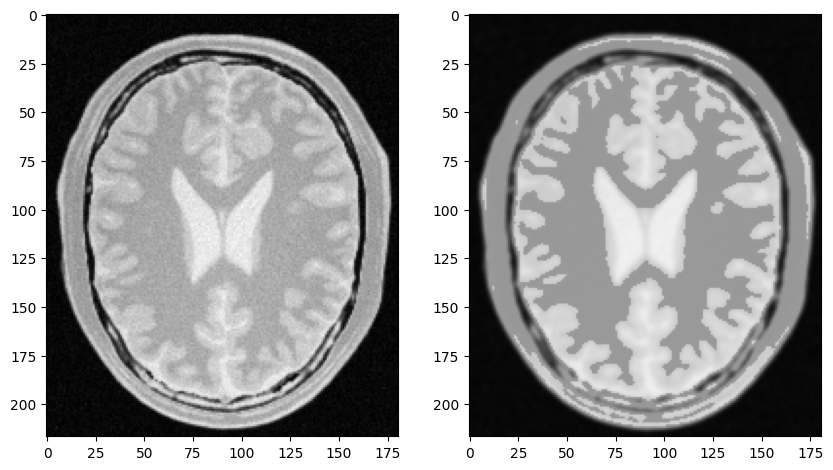

In [42]:

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
#generating intensity map
img_orig2 = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
#Looking at histogram to take an idea about creating transformation array
hist = cv.calcHist([img_orig2], [0], None, [256], [0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()

transform2 = np.linspace(start = 0, stop = 150, num = 150, dtype=np.uint8)
transform2 = np.insert(transform2,transform2.size, np.linspace(start = 150, stop = 155, num = 30, dtype=np.uint8))
transform2 = np.insert(transform2,transform2.size, np.linspace(start = 200, stop = 255, num = 76, dtype=np.uint8))

print(transform2.size)
fig,ax = plt.subplots()
ax.plot(transform2)
ax.set_xlabel( r'Input Intensity, $f(\mathbf{x})$')
ax.set_ylabel('Output Intensity, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('task2_transform.png')
plt.show()

img_orig2_blur = cv.GaussianBlur(img_orig2,(5,5),0)#filter before transformation

image_transformed2 = cv.LUT(img_orig2_blur, transform2)
fig,ax = plt.subplots(1,2,figsize=(10,30))
ax[0].imshow(img_orig2,cmap='gray', vmin=0, vmax=255)
ax[1].imshow(image_transformed2,cmap='gray', vmin=0, vmax=255)
plt.show()

### 3. Gamma Correction

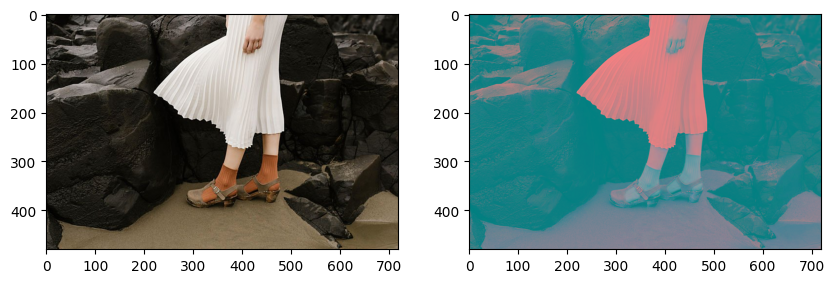

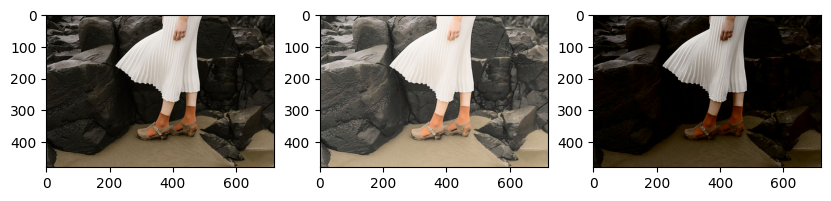

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

bgr_img = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
rgb_img = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
lab_image = cv.cvtColor(bgr_img, cv.COLOR_BGR2Lab)
fig,ax = plt.subplots(1,2,figsize=(10,30))
ax[0].imshow(rgb_img, vmin=0, vmax=255)
ax[1].imshow(lab_image, vmin=0, vmax=255)
plt.show()

L,A,B=cv.split(lab_image) #splitting channels

def gammagenerator(source_img, gamma_value):
    
    conv_table = [((i / 255) ** (1 / gamma_value)) * 255 for i in range(256)]
    conv_table = np.array(conv_table, np.uint8)
    return cv.LUT(source_img, conv_table)

gammaImg1 = cv.merge([gammagenerator(L, 2.2), A, B])  #applying gamma correction & combining channels

gammaImg1_rgb = cv.cvtColor(gammaImg1, cv.COLOR_Lab2RGB)
gammaImg2 = cv.merge([gammagenerator(L, 0.5), A, B])  #applying gamma correction & combining channels
gammaImg2_rgb = cv.cvtColor(gammaImg2, cv.COLOR_Lab2RGB)

fig,ax = plt.subplots(1,3,figsize=(10,30))
ax[0].imshow(rgb_img, vmin=0, vmax=255)
ax[1].imshow(gammaImg1_rgb, vmin=0, vmax=255)
ax[2].imshow(gammaImg2_rgb, vmin=0, vmax=255)
plt.show()


### 4. Histogram Equalization

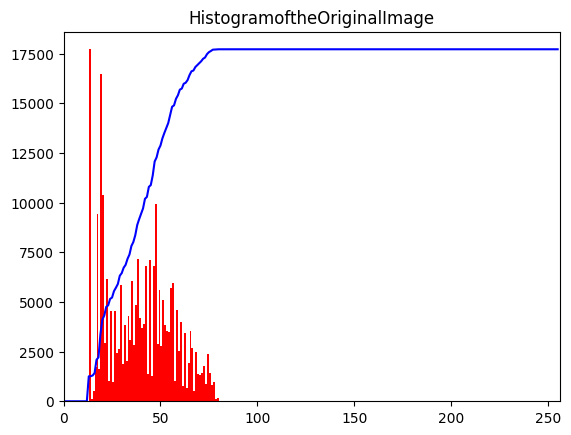

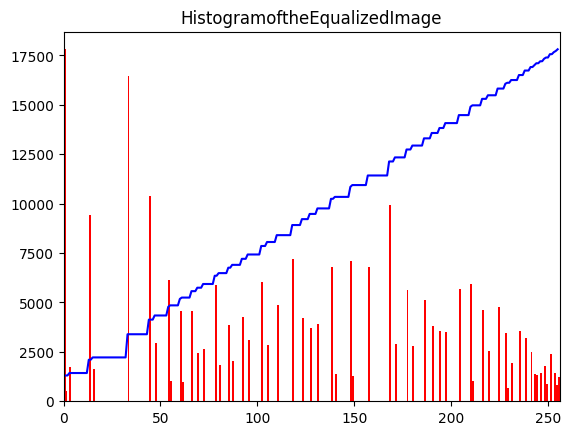

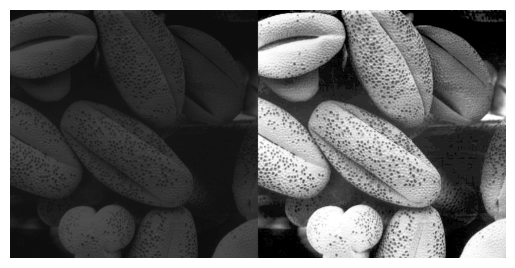

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread('shells.png',cv.IMREAD_GRAYSCALE)

hist,bins=np.histogram(img.ravel(),256,[0,256])
cdf=hist.cumsum()
cdf_normalized=cdf*hist.max()/cdf.max()
plt.plot(cdf_normalized,color='b')
plt.hist(img.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
#plt.legend(('cdf','histogram'),loc='upperleft')
plt.title('HistogramoftheOriginalImage')
plt.show()
equ=cv.equalizeHist(img)
hist,bins=np.histogram(equ.ravel(),256,[0,256])
cdf=hist.cumsum()
cdf_normalized=cdf*hist.max()/cdf.max()
plt.plot(cdf_normalized,color='b')
plt.hist(equ.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
#plt.legend(('cdf','histogram'),loc='upperleft')
plt.title('HistogramoftheEqualizedImage')
plt.show()
res=np.hstack((img,equ))
plt.axis('off')
plt.imshow(res,cmap='gray')